In [2]:
import pandas as pd
import numpy as np

In [3]:
#Importando dados - Enem 2019
dados = pd.read_csv('Base_v2.csv', sep = ';', error_bad_lines=False, index_col=False, dtype='unicode')


In [4]:
#dados do datafrase importado sem nenhum ajuste 
dados.head()


,NU_INSCRICAO,SG_UF_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,SG_UF_ESC,NO_MUNICIPIO_ESC,TP_ENSINO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
0,190001746144,GO,Goiânia,64,F,1,3,1,1,NaN,NaN,NaN,0,0,0,0,0,0
1,190001029147,PA,Belém,26,F,0,3,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,190001177099,TO,Palmas,26,F,1,1,1,1,NaN,NaN,1,0,0,0,0,0,0
3,190001482406,PE,Jaboatão dos Guararapes,27,F,2,3,1,1,NaN,NaN,1,120,120,120,120,80,560
4,190001595933,SP,Cafelândia,21,F,1,1,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#ajustando os dados análise - ajuste de dados de algumas colunas para float para fazer as estimativas e os valores nulos
dados['NU_NOTA_COMP1'] = dados['NU_NOTA_COMP1'].astype(float).fillna(0)
dados['NU_NOTA_COMP2'] = dados['NU_NOTA_COMP2'].astype(float).fillna(0)
dados['NU_NOTA_COMP3'] = dados['NU_NOTA_COMP3'].astype(float).fillna(0)
dados['NU_NOTA_COMP4'] = dados['NU_NOTA_COMP4'].astype(float).fillna(0)
dados['NU_NOTA_COMP5'] = dados['NU_NOTA_COMP5'].astype(float).fillna(0)
dados['NU_NOTA_REDACAO'] = dados['NU_NOTA_REDACAO'].astype(float).fillna(0)
dados['TP_SEXO'] = dados['TP_SEXO'].fillna(0)
dados['TP_ENSINO'] = dados['TP_ENSINO'].fillna(0)
dados['SG_UF_ESC'] = dados['SG_UF_ESC'].fillna(0)
dados['NO_MUNICIPIO_ESC'] = dados['NO_MUNICIPIO_ESC'].fillna(0)
dados['NU_IDADE'] = dados['NU_IDADE'].astype(float)

In [ ]:
uf_sul = ['RS', 'SC', 'PR']
uf_sudeste = ['SP', 'RJ', 'ES', 'MG']
uf_nordeste = ['BA', 'SE', 'AL','PE','PB','RN', 'CE', 'PI', 'MA']
uf_centro_oeste = ['MT', 'MS', 'GO','DF']
uf_norte = ['TO','PA','AM','AP','AC','RO','RR']

dados_sul = dados[dados['SG_UF_RESIDENCIA'].isin(uf_sul)]
dados_sul['REGIAO'] = 'Sul'

dados_sudeste = dados[dados['SG_UF_RESIDENCIA'].isin(uf_sudeste)]
dados_sudeste['REGIAO'] = 'Sudeste'

dados_nordeste = dados[dados['SG_UF_RESIDENCIA'].isin(uf_nordeste)]
dados_nordeste['REGIAO'] = 'Nordeste'

dados_norte = dados[dados['SG_UF_RESIDENCIA'].isin(uf_norte)]
dados_norte['REGIAO'] = 'Norte'

dados_centro_oeste = dados[dados['SG_UF_RESIDENCIA'].isin(uf_centro_oeste)]
dados_centro_oeste['REGIAO'] = 'Centro - Oeste'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [ ]:
#calcula a média
df_media_sudeste = dados_sudeste.loc[dados_sudeste['NU_NOTA_COMP1'] >= 0,['NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO']].sum(axis=1).mean()
df_media_sul = dados_sul.loc[dados_sul['NU_NOTA_COMP1'] >= 0,['NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO']].sum(axis=1).mean()
df_media_nordeste = dados_nordeste.loc[dados_nordeste['NU_NOTA_COMP1'] >= 0,['NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO']].sum(axis=1).mean()
df_media_centro_oeste = dados_centro_oeste.loc[dados_centro_oeste['NU_NOTA_COMP1'] >= 0,['NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO']].sum(axis=1).mean()


In [ ]:
#unir dados de todos os dataframe
df_dados = pd.concat([dados_sul,dados_sudeste, dados_centro_oeste,dados_norte, dados_nordeste])
df_dados


,NU_INSCRICAO,SG_UF_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,SG_UF_ESC,NO_MUNICIPIO_ESC,TP_ENSINO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,REGIAO
7,190001871247,PR,Cascavel,20.0,M,1,3,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Sul
14,190001871248,PR,Foz do Iguaçu,30.0,M,1,1,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Sul
22,190001871249,PR,Curitiba,35.0,M,1,1,1,1,0,0,0,140.0,180.0,140.0,120.0,160.0,740.0,Sul
26,190001698277,SC,Criciúma,18.0,F,1,1,1,1,0,0,0,160.0,140.0,160.0,160.0,100.0,720.0,Sul
38,190001720508,RS,Estação,23.0,M,1,1,1,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Sul
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3369354,190004521486,BA,Eunápolis,23.0,F,1,3,1,1,0,0,1,80.0,120.0,120.0,120.0,40.0,480.0,Nordeste
3369357,190004455203,PB,Várzea,21.0,M,1,3,1,2,PB,Várzea,1,0.0,0.0,0.0,0.0,0.0,0.0,Nordeste
3369360,190004439258,AL,Maceió,19.0,F,1,3,1,1,0,0,0,140.0,160.0,160.0,160.0,140.0,760.0,Nordeste
3369362,190003935851,MA,São Luís,27.0,F,1,3,1,1,0,0,0,120.0,120.0,120.0,120.0,100.0,580.0,Nordeste


In [ ]:
#Ajuste de dados 
df_dados['TP_ESTADO_CIVIL'].replace('1', 'Solteiro(a)', inplace=True)
df_dados['TP_ESTADO_CIVIL'].replace('0', 'Não Informado', inplace=True)
df_dados['TP_ESTADO_CIVIL'].replace('2', 'Casado(a)/Mora com o companheiro(a)', inplace=True)
df_dados['TP_ESTADO_CIVIL'].replace('3', 'Divorciado(a)/Desquitado(a)/Separado(a)', inplace=True)
df_dados['TP_ESTADO_CIVIL'].replace('4', 'Viúvo(a)', inplace=True)



In [ ]:
df_dados['TP_ESTADO_CIVIL'].unique()


array(['Solteiro(a)', 'Casado(a)/Mora com o companheiro(a)',
       'Não Informado', 'Divorciado(a)/Desquitado(a)/Separado(a)',
       'Viúvo(a)', nan], dtype=object)

In [ ]:
df_dados['TP_ESTADO_CIVIL']

7          Solteiro(a)
14         Solteiro(a)
22         Solteiro(a)
26         Solteiro(a)
38         Solteiro(a)
              ...     
3369354    Solteiro(a)
3369357    Solteiro(a)
3369360    Solteiro(a)
3369362    Solteiro(a)
3369363            NaN
Name: TP_ESTADO_CIVIL, Length: 3369364, dtype: object

In [ ]:
df_dados['TP_ESTADO_CIVIL'].value_counts()


Solteiro(a)                                2944732
Casado(a)/Mora com o companheiro(a)         235512
Não Informado                               131991
Divorciado(a)/Desquitado(a)/Separado(a)      53563
Viúvo(a)                                      3565
Name: TP_ESTADO_CIVIL, dtype: int64

In [ ]:
df_dados['TP_COR_RACA'].value_counts()

3    1597691
1    1167114
2     437962
4      78117
0      67219
5      21260
Name: TP_COR_RACA, dtype: int64

In [ ]:
#Dados sem ajustes raça
df_dados['TP_COR_RACA']

7            3
14           1
22           1
26           1
38           1
          ... 
3369354      3
3369357      3
3369360      3
3369362      3
3369363    NaN
Name: TP_COR_RACA, Length: 3369364, dtype: object

In [ ]:
df_dados['TP_COR_RACA'].replace('0', 'Não declarado', inplace=True)
df_dados['TP_COR_RACA'].replace('1', 'Branca', inplace=True)
df_dados['TP_COR_RACA'].replace('2', 'Preta', inplace=True)
df_dados['TP_COR_RACA'].replace('3', 'Parda', inplace=True)
df_dados['TP_COR_RACA'].replace('4', 'Amarela', inplace=True)
df_dados['TP_COR_RACA'].replace('5', 'Indígena', inplace=True)

In [ ]:
df_dados['TP_ESCOLA'].replace('1', 'Não respondeu', inplace=True)
df_dados['TP_ESCOLA'].replace('2', 'Pública', inplace=True)
df_dados['TP_ESCOLA'].replace('3', 'Privada', inplace=True)
df_dados['TP_ESCOLA'].replace('4', 'Exterior', inplace=True)

In [ ]:
df_dados['TP_ESCOLA'].value_counts()

Não respondeu    2270562
Pública           941500
Privada           157301
Name: TP_ESCOLA, dtype: int64

In [ ]:
df_dados.describe()

,NU_IDADE,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
count,3.369329e+06,3.369364e+06,3.369364e+06,3.369364e+06,3.369364e+06,3.369364e+06,3.369364e+06
mean,2.167506e+01,9.648909e+01,9.898019e+01,9.251237e+01,9.799810e+01,7.502337e+01,4.610031e+02
std,7.008898e+00,5.735191e+01,6.336491e+01,5.919800e+01,6.049263e+01,6.555353e+01,2.893490e+02
min,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.800000e+01,8.000000e+01,4.000000e+01,4.000000e+01,8.000000e+01,0.000000e+00,2.800000e+02
50%,1.900000e+01,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02,8.000000e+01,5.400000e+02
75%,2.300000e+01,1.400000e+02,1.200000e+02,1.200000e+02,1.400000e+02,1.200000e+02,6.400000e+02
max,9.400000e+01,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,1.000000e+03


In [ ]:
df_remove = df_dados.loc[(df_dados['TP_SEXO']== 0)]

df_dados.drop(df_remove.index, inplace=True)

df_dados['TP_SEXO'].unique()

array(['M', 'F'], dtype=object)

In [ ]:
#media por Sexo
df_dados.groupby(['REGIAO','TP_SEXO']).mean()

NU_IDADE  ...  NU_NOTA_REDACAO
REGIAO         TP_SEXO             ...                 
Centro - Oeste F        21.625154  ...       454.682727
               M        21.850969  ...       444.368513
Nordeste       F        21.678140  ...       464.013883
               M        21.896268  ...       452.989123
Norte          F        22.993203  ...       431.279362
               M        23.007096  ...       423.311186
Sudeste        F        21.146400  ...       477.709940
               M        21.455711  ...       471.219902
Sul            F        21.000162  ...       468.202071
               M        21.582470  ...       453.096055

[10 rows x 7 columns]

In [ ]:
df_dados.groupby(['REGIAO','TP_SEXO']).agg(['mean','max','min'])

NU_IDADE              ... NU_NOTA_REDACAO             
                             mean   max   min  ...            mean     max  min
REGIAO         TP_SEXO                         ...                             
Centro - Oeste F        21.625154  77.0  12.0  ...      454.682727  1000.0  0.0
               M        21.850969  85.0  12.0  ...      444.368513  1000.0  0.0
Nordeste       F        21.678140  94.0  10.0  ...      464.013883  1000.0  0.0
               M        21.896268  83.0  11.0  ...      452.989123  1000.0  0.0
Norte          F        22.993203  78.0  12.0  ...      431.279362  1000.0  0.0
               M        23.007096  79.0  12.0  ...      423.311186  1000.0  0.0
Sudeste        F        21.146400  91.0  11.0  ...      477.709940  1000.0  0.0
               M        21.455711  88.0  12.0  ...      471.219902  1000.0  0.0
Sul            F        21.000162  79.0  10.0  ...      468.202071   980.0  0.0
               M        21.582470  84.0  13.0  ...      453.096055  1000.0  0.0

[10 rows x 21 columns]

In [ ]:
df_dados_soma = df_dados.iloc[:,12:16].sum(axis=1)
df_dados_soma

7            0.0
14           0.0
22         580.0
26         620.0
38           0.0
           ...  
3369354    440.0
3369357      0.0
3369360    620.0
3369362    480.0
3369363      0.0
Length: 3369364, dtype: float64

In [ ]:
df_dados.groupby(['REGIAO']).mean()

,NU_IDADE,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO
REGIAO,,,,,,,
Centro - Oeste,21.710151,94.534449,97.104038,90.326814,95.963578,72.871587,450.800465
Nordeste,21.763465,95.638662,99.131624,92.460801,98.090777,74.379441,459.701305
Norte,22.998572,90.520256,92.748675,86.688802,92.636355,65.605664,428.199751
Sudeste,21.261055,99.129891,101.559310,94.974372,100.135945,79.504688,475.304206
Sul,21.212156,99.006595,98.263811,92.728868,98.150723,74.552550,462.702547


In [ ]:
df_dados['SOMA'] = df_dados[['NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO']].sum(axis=1)

In [39]:
df_dados

,NU_INSCRICAO,SG_UF_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ESCOLA,SG_UF_ESC,NO_MUNICIPIO_ESC,TP_ENSINO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,REGIAO,SOMA
7,190001871247,PR,Cascavel,20.0,M,Solteiro(a),Parda,1,Não respondeu,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Sul,0.0
14,190001871248,PR,Foz do Iguaçu,30.0,M,Solteiro(a),Branca,1,Não respondeu,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Sul,0.0
22,190001871249,PR,Curitiba,35.0,M,Solteiro(a),Branca,1,Não respondeu,0,0,0,140.0,180.0,140.0,120.0,160.0,740.0,Sul,1480.0
26,190001698277,SC,Criciúma,18.0,F,Solteiro(a),Branca,1,Não respondeu,0,0,0,160.0,140.0,160.0,160.0,100.0,720.0,Sul,1440.0
38,190001720508,RS,Estação,23.0,M,Solteiro(a),Branca,1,Não respondeu,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,Sul,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3369354,190004521486,BA,Eunápolis,23.0,F,Solteiro(a),Parda,1,Não respondeu,0,0,1,80.0,120.0,120.0,120.0,40.0,480.0,Nordeste,960.0
3369357,190004455203,PB,Várzea,21.0,M,Solteiro(a),Parda,1,Pública,PB,Várzea,1,0.0,0.0,0.0,0.0,0.0,0.0,Nordeste,0.0
3369360,190004439258,AL,Maceió,19.0,F,Solteiro(a),Parda,1,Não respondeu,0,0,0,140.0,160.0,160.0,160.0,140.0,760.0,Nordeste,1520.0
3369362,190003935851,MA,São Luís,27.0,F,Solteiro(a),Parda,1,Não respondeu,0,0,0,120.0,120.0,120.0,120.0,100.0,580.0,Nordeste,1160.0


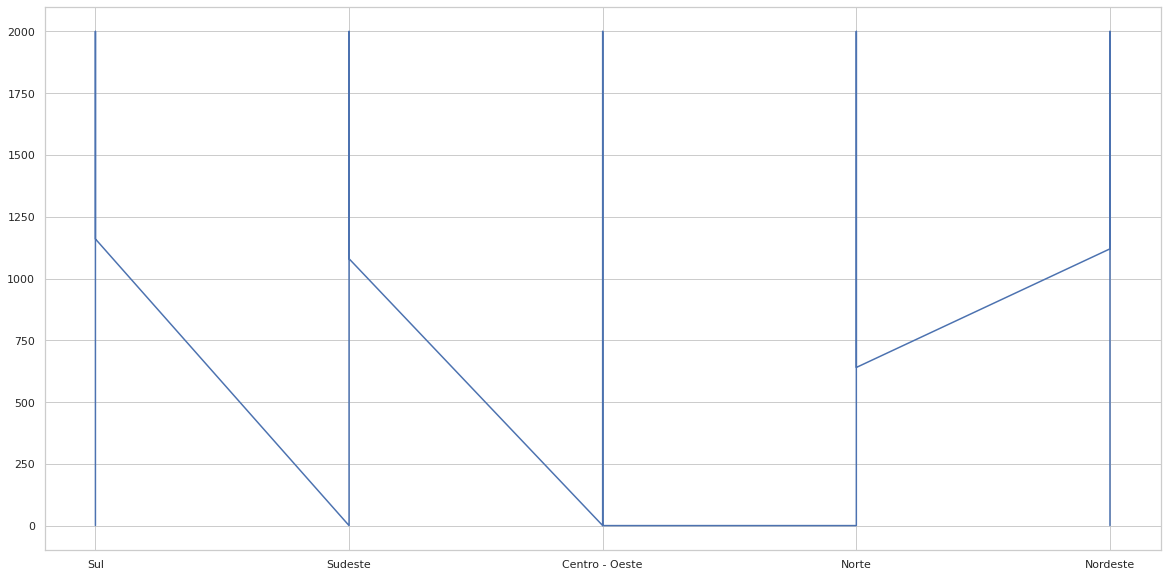

In [54]:
from matplotlib import pyplot as plt
  
 
plt.plot(df_dados['REGIAO'],df_dados['SOMA'])  
plt.show()